# In Verbis Virtus - Data visualization
## Show player path for session
This notebook is an initial experiment to try to visualize the paths taken by players in different game sessions.  
There are many improvements that can be introduced, but it is a starting point to work on with the IVV development team.  
  
### Some initial imports and functions definitions

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

def list_players(folder:str = './fact/CSV'):
    filename = f'{folder}/players.csv'
    players_df= pd.read_csv(filename)
    return players_df

def open_steps(player_id:str, folder:str = './fact/CSV/players'):
    filename = f'{folder}/player_{player_id}.csv'
    steps_df = pd.read_csv(filename)
    return steps_df

def list_sessions(df:pd.DataFrame):
    print(df['session_id'].unique())

def plot_session(df:pd.DataFrame, session:int):
    df_toplot = df[df.session_id == session]
    map_info = df_toplot['map_info'].iloc[0]
    events = df_toplot['event_type'].unique()
    if (len(events) == 1) & (events[0] == 'Heartbeat'):
        samex = all(i == df_toplot['posx'].iloc[0].item() for i in df_toplot['posx'])
        samey = all(i == df_toplot['posy'].iloc[0].item() for i in df_toplot['posy'])
        if samex & samey:
            plt.scatter(df_toplot.posx, df_toplot.posy, c='blue', label='Position')
    else:
        color_dict ={
        'AddKnownPhrase' : 'lime',
        'CastAbort' : 'navy',
        'InitialPosition' : 'orange',
        'JournalAddAnnotation' : 'tomato',
        'JournalAddDocument' : 'chocolate',
        'JournalAddSpell' : 'peachpuff',
        'JournalPlayPronunciation' : 'aqua',
        'JournalReadAnnotation' : 'coral',
        'JournalReadDocument' : 'sandybrown',
        'JournalReadSpell' : 'peru',
        'Jump' : 'magenta',
        'PawnDied' : 'black',
        'Recognition': 'tan',
        'SpellEndInteraction': 'royalblue',
        'UseAction' : 'limegreen'
        }
        plt.plot(df_toplot.posx, df_toplot.posy, c='blue', label='Path')
        for event in events:
            if event != 'Heartbeat':
                plt.scatter(df_toplot[df_toplot.event_type==event].posx, df_toplot[df_toplot.event_type==event].posy, c=color_dict[event], label=event)
    plt.title(f'Session {session} - Map: {map_info}',fontdict={'size':15})
    plt.xlabel('Pos X',fontdict={'size':12})
    plt.ylabel('Pos Y',fontdict={'size':12})
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.legend( prop={'size': 8})
    plt.show()

def plot_sessions(df:pd.DataFrame, sessions:list = []):
    all_sessions = df['session_id'].unique()
    if not sessions:
        sessions = all_sessions
    num_sessions = len(sessions)
    if num_sessions > 6:
        print (f'{num_sessions} sessions have been identified that will generate {num_sessions} graphs, are you sure you want to continue? [y/n]')
        resp = input()
        if (resp != 'y'):
            print ('OK, session ended')
            return -1
        else:
            print ('Well, I\'ll continue with my work.')
    for session in sessions:
        if session in all_sessions:
            plot_session(df, session)
        else:
            print(f'Session {session} in not in range')


## Let's try to plot session for a player

### Start listing some players

In [82]:
list_players().head(20)

,Unnamed: 0,player
0,0,0x011000000000FFFF
1,1,0x0110000100000666
2,2,0x011000010000E2BE
3,3,0x011000010001A524
4,4,0x01100001000300BB
5,5,0x011000010012C003
6,6,0x01100001001638FA
7,7,0x01100001002F5067
8,8,0x011000010034556F
9,9,0x011000010040D047


### Load data for the selected player

In [89]:
steps = open_steps('0x01100001005E6D51')

### List the sessions for the selected player

In [90]:
list_sessions(steps)

[ 1  2  3  4  5  6  7  8  9 10 11]


### Plot some sessions

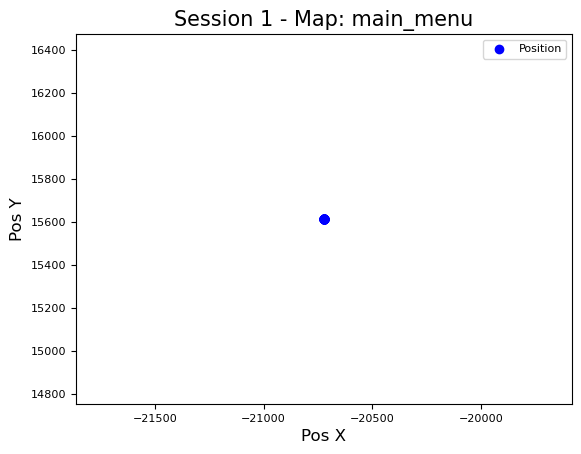

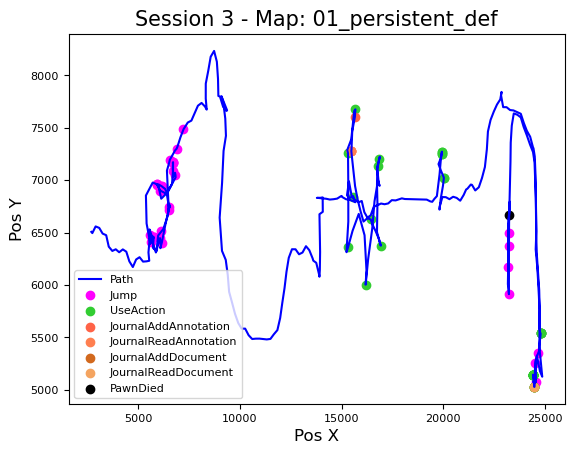

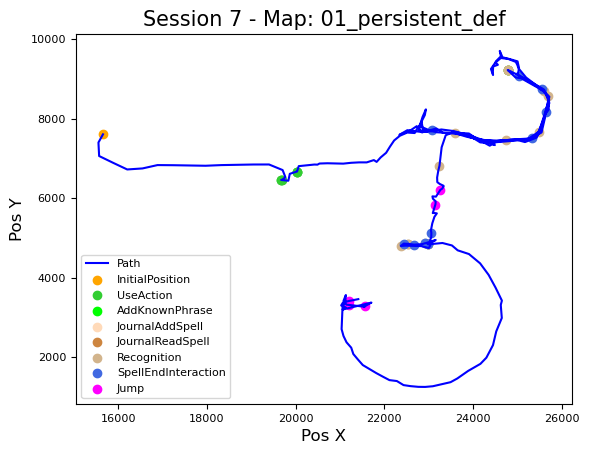

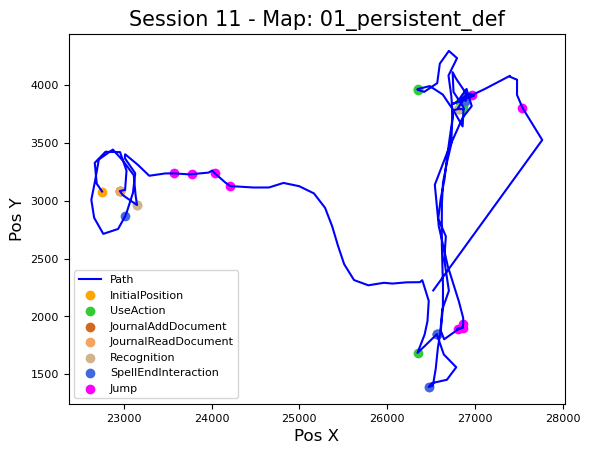

In [100]:
plot_sessions(steps, [1, 3, 7, 11])